<div class="alert alert-block alert-info">
    
<font color='blue'>

# PROSPER + Openserver + Phyton
# Sensitivity Analysis for Gas Well Model (PROSPER)

</font>

</div>




## 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#import cv2

from collections import defaultdict       # library to create var dictionaries
from openserver import OpenServer
from IPython.display import Javascript    # run multiple cells at once
from IPython.display import display_html  # Display Multiple Data Frames in one cell
from IPython.display import clear_output  # Clear output cell

### Set RGB color variables to reduce code
c_red = (255/255, 0/255, 0/255) # red
c_blue = (0/255, 0/255, 255/255) # Blue
c_green = (0/255, 255/255, 0/255) # Green
c_orange = (255/255, 165/255, 0/255) # Orange
c_pale_green = (152/255,251/255,152/255) # Pale green
c_Dred = (139/255,0/255,0/255) # Dark red
c_black = (0/255,0/255,0/255)
c_LDark = (0/149,0/149,0/149) # Light dark

## 2. Input Variables

Set input Variables as distributions or constants <br>
If variables _Const is True, one single value will be sent to PROSPER model <br>
Units must be checked on PROSPER model

In [2]:
### RESERVOIR PRESSURE - Uniform distribution ###
Pr_low, Pr_high = 2600, 2800 
Pr_Const, Pr_Val_Const = False, 2500

## PERMEABILITY
k_Low_limit, k_High_limit = 0.001, 100 # Permeability limits to truncate distribution. Avoid negative permeability

k_mean, k_SD= 10, 6 
k_Const, k_Val_Const = False, 7

### RESERVOIR HEIGHT ###
h_Low_limit, h_High_limit = 0.1, 500 #limits to truncate distribution

h_mean, h_SD= 45, 6 
h_Const, h_Val_Const = False, 20

### PERFORATION INTERVAL ###
### Max limit must be equal or less than Reservoir Height
### Iterations where Perforation interval is more than Reservoir Height 
### the Perforatio interval will be set equal to reservoir height
Perf_Low, Perf_High= 15, 20 #limits to truncate distribution
Perf_Const, Perf_Val_Const = False, 20



### Skin ###
S_Low_limit, S_High_limit = -5, 200 #limits to truncate distribution

S_mean, S_SD= 2, 20 
S_Const, S_Val_Const = False, 2

### WGR ###
WGR_Low_limit, WGR_High_limit = 0, 1000 #limits to truncate distribution

WGR_mean, WGR_SD= 70, 30 
WGR_Const, WGR_Val_Const = False, 50

### Drainage Area - Uniform distribution ### 
DA_low, DA_high= 200, 300 
DA_Const, DA_Val_Const = True, 62

### Top Node Pressure ###
Top_Press_low, Top_Press_high= 350, 1230 # Top Node Pressure limits
Top_Press_Const, Top_Press_Val_Const = False, 350

## 3. Plot input variables distributions

Run multiple Cells to create Input variable distributions and CQ

In [3]:
### CELL 7 ###
Javascript("Jupyter.notebook.execute_cell_range(7,14)") 

<IPython.core.display.Javascript object>

### Plot variables with uniform distribution

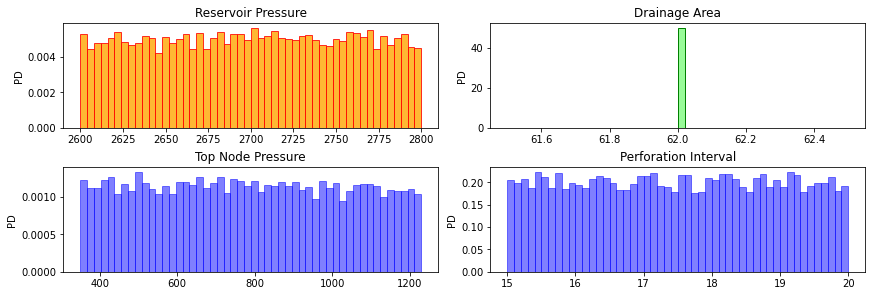

In [4]:
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12,4), layout ='constrained')

Pr = np.random.uniform(low=Pr_low, high= Pr_high, size = 10000)
n_bins = 50

# Graficar distribución
ax[0,0].hist(Pr, bins=n_bins, density=True, align='mid', color=c_orange, alpha=0.8, edgecolor = "red")
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('PD')
ax[0,0].set_title('Reservoir Pressure')


# Graficar distribución - DRAINAGE AREA
if DA_Const == True:
    DA = np.random.uniform(low = DA_Val_Const, high = DA_Val_Const, size = 10000)
else:
    DA = np.random.uniform(low = DA_low, high = DA_high, size = 10000)

ax[0,1].hist(DA, bins=n_bins, density=True, align='mid', color=c_pale_green, alpha=1, edgecolor = "Green")
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('PD')
ax[0,1].set_title('Drainage Area')

# Graficar distribución - TOP NODE PRESSURE
if Top_Press_Const == True:
    Top_Press = np.random.uniform(low = Top_Press_Val_Const, high = Top_Press_Val_Const, size = 10000)
else:
    Top_Press = np.random.uniform(low = Top_Press_low, high = Top_Press_high, size = 10000)
    
ax[1,0].hist(Top_Press, bins=n_bins, density=True, align='mid', color=c_blue, alpha=0.5, edgecolor = "blue")
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('PD')
ax[1,0].set_title('Top Node Pressure');

Perf = np.random.uniform(low = Perf_Low, high = Perf_High, size = 10000)

ax[1,1].hist(Perf, bins=n_bins, density=True, align='mid', color=c_blue, alpha=0.5, edgecolor = "blue")
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('PD')
ax[1,1].set_title('Perforation Interval');

### Create function to plot normal distributions

In [5]:
def Generate_normal_and_Truncated(V_mu,V_SD,V_samples,V_Low_limit,V_High_limit, V_x_Label, V_Title, n_col):
    n_bins = 30
    N_Samples = np.random.normal(loc = V_mu, scale = V_SD, size= V_samples) # normal distribution
    
    # Plot Normal Distribution
    AX[0,n_col].hist(N_Samples, bins=n_bins, density=True, align='mid', color=(RBG), alpha=0.7, edgecolor = "black")
    AX[0,n_col].set_xlabel(V_x_Label)
    AX[0,n_col].set_ylabel('Probability Density')
    AX[0,n_col].set_title(V_Title, weight='bold')
    x_axis = AX[0,n_col].set_xlim()

    ## generate data for truncated normal distribution
    NT_Samples = stats.truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD,size=V_samples)

    ## Plot truncated Normal distribution
    AX[1,n_col].hist(NT_Samples, bins=n_bins, density=True, align='mid', color=(RBG), alpha=0.4, edgecolor = "black")
    AX[1,n_col].set_xlabel(V_x_Label)
    AX[1,n_col].set_ylabel('Probability Density')
    AX[1,n_col].set_title(V_Title + ' (TRUNCATED)', weight='bold')
    AX[1,n_col].set_xlim(x_axis)


## Permeability, Height, Skin, WGR  Distributions

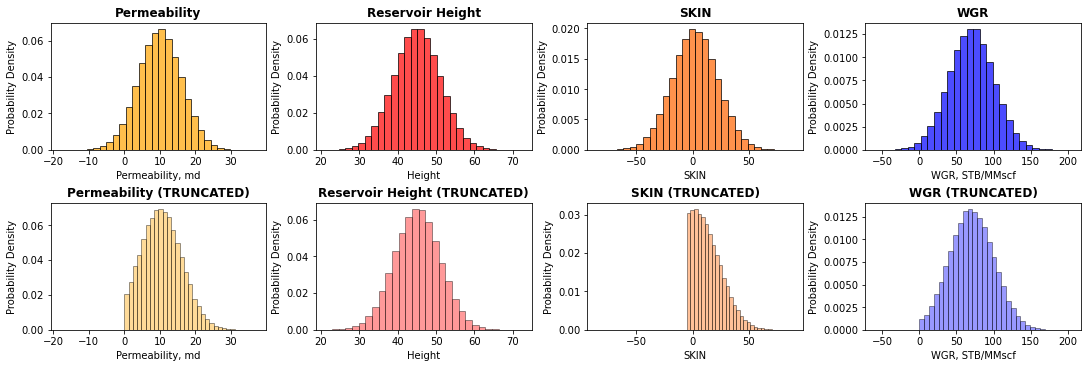

In [6]:
fig, AX = plt.subplots(nrows = 2, ncols=4, figsize=(15,5), layout ='constrained')

V_Title, V_x_Label = 'Permeability', 'Permeability, md'
RBG = c_orange
Generate_normal_and_Truncated(k_mean, k_SD, 100000, k_Low_limit, k_High_limit, V_x_Label, V_Title, 0)

V_Title, V_x_Label = 'Reservoir Height', 'Height'
RBG = c_red
Generate_normal_and_Truncated(h_mean, h_SD, 100000,h_Low_limit,h_High_limit, V_x_Label, V_Title, 1)

V_Title, V_x_Label = 'SKIN', 'SKIN'
RBG = 255/255, 100/255, 0/255
Generate_normal_and_Truncated(S_mean, S_SD, 100000,S_Low_limit,S_High_limit, V_x_Label, V_Title, 2)

V_Title, V_x_Label = 'WGR', 'WGR, STB/MMscf'
RBG = c_blue
Generate_normal_and_Truncated(WGR_mean, WGR_SD, 100000, WGR_Low_limit, WGR_High_limit, V_x_Label, V_Title, 3)

# Well Choke input

In [7]:
### Well Choke ###
Choke_low, Choke_high= 8, 104 # Choke limits
Choke_Const, Choke_Val_Const = False, 36

Choke_list = [8,10,12,14,16,18,20,22,24,26,28,30,32,40,64]


# Import production test history data 

In [ ]:
df_PDP_hist = pd.read_csv ('comp_PDP_data.csv')
df_PDP_hist['Gas'] = df_PDP_hist['Gas'].div(1000)
df_PDP_hist.describe()

In [ ]:
# Extract Choke List
# Specify if the Choke list is used as input for PROSPER
CK_PT_list = df_PDP_hist['Choke'].unique()
#CK_PT_list

use_PT_choke = True

if use_PT_choke == True:
    Choke_list = CK_PT_list

CK_PT_list


<div class="alert alert-success">
<font color='blue'>
    
# VLP correlation
Specify if VLP correlation will be used as variable for each iteration
***
</font>
Cell 19
</div>

In [ ]:
### if VLP_corr_status = true, each iteration will have different VLP correlation 

VLP_corr_status = True

VLP_index_list = [0,1,2,4,5,8,9,10,11,12,14,18,19]
print('Total number of correlations = ',len(VLP_index_list), '\n')

VLP_names = ['DunsandRosModified', 'HagedornBrown', 'FancherBrown', 'MukerjeeBrill', 'BeggsandBrill', \
             'PetroleumExperts', 'Orkiszewski', 'PetroleumExperts2', 'DunsandRosOriginal', 'PetroleumExperts3', \
             'GREmodifiedbyPE', 'PetroleumExperts4', 'Hydro3P']

xii  = 0
for xi in VLP_names:
    print(VLP_index_list[xii], VLP_names[xii] )
    xii = xii + 1


**Exclude Correlations: GREmodifiedbyPE and PetroleumExperts4 <br>**
**These correlations take longer time to calculate. Running the next cell wil exclude these two correlations**

In [8]:
VLP_corr_status = True

VLP_index_list = [0,1,2,4,5,8,9,10,11,12,19]
print('Total number of correlations = ',len(VLP_index_list), '\n')

VLP_names = ['DunsandRosModified', 'HagedornBrown', 'FancherBrown', 'MukerjeeBrill', 'BeggsandBrill', \
             'PetroleumExperts', 'Orkiszewski', 'PetroleumExperts2', 'DunsandRosOriginal', 'PetroleumExperts3', \
              'Hydro3P']

      

xii  = 0
for xi in VLP_names:
    print(VLP_index_list[xii], VLP_names[xii] )
    xii = xii + 1
    

Total number of correlations =  11 

0 DunsandRosModified
1 HagedornBrown
2 FancherBrown
4 MukerjeeBrill
5 BeggsandBrill
8 PetroleumExperts
9 Orkiszewski
10 PetroleumExperts2
11 DunsandRosOriginal
12 PetroleumExperts3
19 Hydro3P


<div class="alert alert-success">
<font color='blue'>
 
# 4. Start Calculations for Sensitivity Analysis

1. Generate input variables based on distributions
2. Send the input variables from Jupyter Notebook to Well model (PROSPER)
3. Update Well IPR
4. Calculate Well Model (solve for VLP and IPR)
5. Import results from Well Model (PROSPER) to Jupyter Notebook. Results are saved inside dictionary variables
    
***
</font>   
Cell 23
</div>

In [9]:
## Create Dictionaries to fill inputs, results ##
## Everytime this cell is run the dictionary variables are reset ##

my_dict = defaultdict(list) # dictionary to save VLP and IPR Curves
my_dict_sol = defaultdict(list) # dictionary to save ALL Solutions
my_dict_sol_int = defaultdict(list) # dictionary to save iterations with solutions (Qg > 0)

my_dict_input_S = defaultdict(list) # dictionary to save Input WITH solution
my_dict_input_NS = defaultdict(list) # dictionary to save Input WITHOUT solution
my_dict_input_vals = defaultdict(list) # dictionary to save Inputs from loop


## Check if OpenServer Lic is open
if 'c' in locals():
    print('c is active')
else:
    c = OpenServer()
    
c.connect()

iter = 500 ## Loop iterations

n = range(iter)

for i in n:
    
    #print('Index: ', i)
    
    ## Reservoir Pressure ##
    if Pr_Const == True:
        Pr =[Pr_Val_Const]
    else:
        Pr = np.random.uniform(low=Pr_low, high= Pr_high, size = 1)
        
    my_dict_input_vals['Pr'].extend(Pr)
    
    
    ### DRAINAGE AREA ###
    if DA_Const == True:
        DA =[DA_Val_Const]
    else:
        DA = np.random.uniform(low=DA_low, high= DA_high, size = 1)
        
    my_dict_input_vals['DA'].extend(DA)    

    #print('Drainage Area = ', DA)
    
    ### PERMEABILITY ###
    if k_Const == True:
        k =[k_Val_Const]
    else:
        mu = k_mean #mean
        sigma = k_SD #SD
        k = stats.truncnorm.rvs((k_Low_limit-mu)/sigma,(k_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
                
    my_dict_input_vals['k'].extend(k)   

    #print('Perm = ', k)
    

    ### HEIGHT ###
    if h_Const == True:
        h =[h_Val_Const]
    else:
        mu = h_mean #mean
        sigma = h_SD #SD
        h = stats.truncnorm.rvs((h_Low_limit-mu)/sigma,(h_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
    
    my_dict_input_vals['h'].extend(h)      
   
    ## Perforation Interval ##
    if Perf_Const == True:
        Perf =[Perf_Val_Const]
    else:
        Perf = np.random.uniform(low=Perf_Low, high= Perf_High, size = 1)
    
    if Perf > h:
        Perf = h
    
    my_dict_input_vals['Perforation Interval'].extend(Perf)   
 
 
    ### SKIN ###
    if S_Const == True:
        S =[S_Val_Const]
    else:
        mu = S_mean #mean
        sigma = S_SD #SD
        S = stats.truncnorm.rvs((S_Low_limit-mu)/sigma,(S_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
        
    my_dict_input_vals['S'].extend(S)   

    #print('SKIN = ', S)      
    
   
    
    ### WGR ###
    if WGR_Const == True:
        WGR =[WGR_Val_Const]
    else:
        mu = WGR_mean #mean
        sigma = WGR_SD #SD
        WGR = stats.truncnorm.rvs((WGR_Low_limit-mu)/sigma,(WGR_High_limit-mu)/sigma,loc=mu,scale=sigma,size=1)
        
    my_dict_input_vals['WGR'].extend(WGR)   
  
    #print('WGR = ', WGR)  
    



    ### TOP NODE PRESSURE ###
    if Top_Press_Const == True:
        Top_Press =[Top_Press_Val_Const]
    else:
        Top_Press = np.random.uniform(low = Top_Press_low, high = Top_Press_high, size = 1)
        
    my_dict_input_vals['Top_Press'].extend(Top_Press)  
    #print('Top Node Pressure = ', Top_Press)      


    ### VLp Correlation ###
    if VLP_corr_status == True:
        VLP_Index_sample = np.random.choice(VLP_index_list, 1)
        my_dict_input_vals['VLP_Corr'].extend(VLP_Index_sample)
        
        index_vlp = VLP_index_list.index(VLP_Index_sample)
        VLP_Index_sample_Name = VLP_names[index_vlp]
        VLP_Index_sample_Name =[VLP_Index_sample_Name]
        my_dict_input_vals['VLP_Corr_Name'].extend(VLP_Index_sample_Name)
        
        #print('VLP Correlation Index = ', VLP_Index_sample, VLP_Index_sample_Name)   
    else:
        my_dict_input_vals['VLP_Corr'].extend(100)
        my_dict_input_vals['VLP_Corr_Name'].extend(100)
        

    ### WELL CHOKE ###
    if Choke_Const == True:
        Choke =[Choke_Val_Const]
    else:
        Choke = np.random.choice(Choke_list, 1)
        
    my_dict_input_vals['Choke'].extend(Choke)    
    
    
    ###########################################
    ### SEND VALUES TO WELL MODEL - PROSPER ###
    
    ## Set Layer Pressure
    c.DoSet('PROSPER.SIN.IPR.Single.Pres', Pr) # Change Reservoir pressure

    
    ## Set Layer Permeability
    c.DoSet('PROSPER.SIN.IPR.Single.ResPerm', k)

    
    ## Set Layer Height
    c.DoSet('PROSPER.SIN.IPR.Single.Thickness', h)
  
    
    ## Set Skin
    c.DoSet('PROSPER.SIN.IPR.Single.Skin', S)

    
    ## Set WGR 
    c.DoSet('PROSPER.SIN.IPR.Single.WGR', WGR)
    c.DoSet('PROSPER.ANL.SYS.WGR', WGR)
    
    ## Drainage Area
    c.DoSet('PROSPER.SIN.IPR.Single.Drainage', DA)

    
    ## Top Node Pressure
    c.DoSet('PROSPER.ANL.SYS.Pres', Top_Press)
    
    
    ## VLP Correlation
    
    if VLP_corr_status == True:
        c.DoSet('PROSPER.ANL.SYS.TubingLabel', VLP_Index_sample)
    
    ## Well Choke
    c.DoSet('PROSPER.SIN.EQP.Surf.Data[1].ID', Choke/64)
    
    
    ### Calculate new IPR ### Required after changing IPR variables ###
    c.DoCmd('PROSPER.IPR.CALC')
    
    
    
    ## Calculate model 
    c.DoCmd('PROSPER.ANL.SYS.CALC')

    ## Extract Solution

    Gas_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].GasRate[$]')
    IPR_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].IPRpres[$]')
    VLP_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].VLPpres[$]')
    
    Gas_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.GasRate')
    BHP_SOL = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.BHP')
    
    #WHP_SOL = c.DoGet('PROSPER.OUT.SYS.SOL[0].WHP')
    WHP_SOL = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.WHPressure')
    
    #Gas_AOF = c.DoGet('PROSPER.SIN.IPR.Single[19].GASRAT')
    Gas_AOF = c.DoGet('Prosper.SIN.IPR.Single.AOF')
                      
    if Gas_Sol > 1000000:
        Gas_Sol = 0
        BHP_SOL = 0
    
    print('Index: ', i)
    print('Reservoir Pressure = ', (Pr).round(1))
    print('Drainage Area = ', DA)
    print('Perm = ', (k).round(3))
    print('Reservoir thickness = ', (h).round(1))
    print('Perforation Interval = ', (Perf).round(1))
    print('SKIN = ', (S).round(2))
    print('WGR = ', (WGR).round(1))
    print('Top Node Pressure = ', Top_Press)
    print('VLP Correlation Index = ', VLP_Index_sample, VLP_Index_sample_Name) 
    print('Choke = ', Choke)
    print('AOF = ', Gas_AOF) 
    
    print('------')
    print('Gas Rate', str(round(Gas_Sol,3)), ' MMscfd')
    print('Pressure', str(round(BHP_SOL,1)), ' psi')
    print('WHP', str(round(WHP_SOL,1)), ' psi')
    print('------')
    
    T_val = 'Sol_Gas'
    my_dict_sol[T_val].extend([Gas_Sol])
    
    T_val = 'Sol_Pressure'
    my_dict_sol[T_val].extend([BHP_SOL])
    
    ## Insert Input Val to Dictionary When Calculation has NO Solution
    if Gas_Sol > 0:
        my_dict_sol_int['Sol_Gas'].extend([Gas_Sol])
        my_dict_sol_int['Sol_Pressure'].extend([BHP_SOL])
        
        my_dict_input_S['Pr'].extend((Pr).round(1))

        my_dict_input_S['DA'].extend(DA)

        my_dict_input_S['k'].extend(k)

        my_dict_input_S['h'].extend(h)
        
        my_dict_input_S['Perforation Interval'].extend(Perf)  

        my_dict_input_S['S'].extend(S)

        my_dict_input_S['WGR'].extend(WGR)

        my_dict_input_S['Top_Press'].extend(Top_Press)
        my_dict_input_S['VLP_Corr'].extend(VLP_Index_sample)
        my_dict_input_S['VLP_Corr_Name'].extend(VLP_Index_sample_Name)
        
        my_dict_input_S['Sol_Gas'].extend([Gas_Sol])
        my_dict_input_S['Sol_Pressure'].extend([BHP_SOL])
        my_dict_input_S['WHP'].extend([WHP_SOL])
        my_dict_input_S['Choke'].extend(Choke)
        my_dict_input_S['AOF'].extend([Gas_AOF])
        
    if Gas_Sol == 0: 
        my_dict_input_NS['Pr'].extend(Pr)

        my_dict_input_NS['DA'].extend(DA)

        my_dict_input_NS['k'].extend(k)

        my_dict_input_NS['h'].extend(h)
        
        my_dict_input_NS['Perforation Interval'].extend(Perf)  

        my_dict_input_NS['S'].extend(S)

        my_dict_input_NS['WGR'].extend(WGR)

        my_dict_input_NS['Top_Press'].extend(Top_Press)
        my_dict_input_NS['VLP_Corr'].extend(VLP_Index_sample)
        my_dict_input_NS['VLP_Corr_Name'].extend(VLP_Index_sample_Name)
        
        my_dict_input_NS['Sol_Gas'].extend([Gas_Sol])
        my_dict_input_NS['Sol_Pressure'].extend([BHP_SOL])
        my_dict_input_NS['AOF'].extend([Gas_AOF])
    
    
    ## Insert to Dictionary VLP + IPR ##
    T_val = str(i) + '_G'
    my_dict[T_val].extend(Gas_Curve)
    
    T_val = str(i) + '_IPR'
    my_dict[T_val].extend(IPR_Curve)

    T_val = str(i) + '_VLP'
    my_dict[T_val].extend(VLP_Curve)
    
    if i < iter-1:
        clear_output(wait=True)
    
    
c.disconnect


Index:  499
Reservoir Pressure =  [2662.4]
Drainage Area =  [62]
Perm =  [25.962]
Reservoir thickness =  [35.]
Perforation Interval =  [15.8]
SKIN =  [0.21]
WGR =  [97.1]
Top Node Pressure =  [502.02179749]
VLP Correlation Index =  [1] ['HagedornBrown']
Choke =  [14]
AOF =  60.50856781
------
Gas Rate 0.0  MMscfd
Pressure 0.0  psi
WHP 0.0  psi
------


<bound method OpenServer.disconnect of <openserver.openserver.OpenServer object at 0x000001BDB301BFD0>>

In [10]:
### Convert dictionaries to Data Frames ### 

df_VLP_IPR = pd.DataFrame(my_dict)                 # VLP and IPR

df_QP_All = pd.DataFrame(my_dict_sol)              # Solutions ALl iterations (Qg and P)
df_QP_sol = pd.DataFrame(my_dict_sol_int)          # Solutions Iterations with solutions (Qg and P)

df_Input_All = pd.DataFrame(my_dict_input_vals)    # Input for all iterations
df_Input_sol = pd.DataFrame(my_dict_input_S)       # Input for iteration with solution 
df_Input_No_sol = pd.DataFrame(my_dict_input_NS)   # Input for iterations without solution

### Save Data Frames as .csv ###

df_VLP_IPR.to_csv("VLP_IPR.csv",index=False)

df_QP_All.to_csv("Results_ALL_iterations.csv",index=False)
df_QP_sol.to_csv("Results_with_solutions.csv",index=False)

df_Input_All.to_csv("Input_ALL_solutiones.csv",index=False)
df_Input_sol.to_csv("Input_with_solutions.csv",index=False)
df_Input_No_sol.to_csv("Input_No_solutions.csv",index=False)

<div class="alert alert-success">
<font color='blue'>
    
# 5. Run the next cell to import saved .csv files
This will allow to continue working with saved results/inputs without running PROSPER again. <br>
It is still requiered to run cell 1 (import libraries)
    
***
</font>
Cell 25
</div>


In [ ]:
df_VLP_IPR = pd.read_csv ('VLP_IPR.csv')                    # VLP and IPR

df_QP_All = pd.read_csv ('Results_ALL_iterations.csv')      # Solutions ALl iterations (Qg and P)
df_QP_sol = pd.read_csv ('Results_with_solutions.csv')      # Solutions Iterations with solutions (Qg and P)

df_Input_All = pd.read_csv ('Input_ALL_solutiones.csv')     # Input for all iterations
df_Input_sol = pd.read_csv ('Input_with_solutions.csv')     # Input for iteration with solution 
df_Input_No_sol = pd.read_csv ('Input_No_solutions.csv')    # Input for iterations without solution

i = df_QP_All.shape[0]
print('No. Iterations = ',i)

<div class="alert alert-success"> <font color='blue'>
    
# 6. ANALYZE RESULTS -  PRESSURE/GAS RATE @ Solution Node
Cell 27
***
</font> </div>

In [ ]:
## RUN ALL CELLS BELOW ##
display(Javascript('IPython.notebook.execute_cells_below()'))


In [ ]:
# RUN MULTIPLE CELLS
Javascript("Jupyter.notebook.execute_cell_range(30,46)")

## Iterations with and without solution (VLP/IPR intersection)
    There are 2 dictionaries/DataFrames containing the results
    df_QP_All = All iterations
    df_QP_sol = Iterations with solution (Qg > 0)

In [11]:
## Show how many solutions are = 0
Iterations_No_Sol = (df_QP_All['Sol_Gas'] == 0).sum()
It_with_Sol = (df_QP_All['Sol_Gas'] > 0).sum()

perc_No_Sol = Iterations_No_Sol/(Iterations_No_Sol+It_with_Sol)*100
perc_with_Sol = 100 - perc_No_Sol

print('* Total Iterations = ', i+1)
print('* Iterations without Solution =', Iterations_No_Sol, '(',perc_No_Sol.round(2),'%)' )
print('* Iterations with Solution =', It_with_Sol, '(',perc_with_Sol.round(2),'%)' )

###########################################
### Compare DataFrames first 10 records ###
dfS_col_names = df_QP_All.columns.tolist()
dfS_In_col_names = df_QP_sol.columns.tolist()

df1 = df_QP_All.head(12)
df2 = df_QP_sol.head(12)

df1 = df1.style.format(precision=2)
df2 = df2.style.format(precision=2)

df1_styler = df1.set_table_attributes("style='display:inline'").set_caption('All Iteration Results')
df2_styler = df2.set_table_attributes("style='display:inline'").set_caption('Iterations with Solution')

### Compare Stadistics ###
dfS_col_names = df_QP_All.columns.tolist()
dfS_In_col_names = df_QP_sol.columns.tolist()

df3 = pd.DataFrame(df_QP_All.describe(percentiles=[0.1,.2, .4, .6, .8,0.9]), columns=dfS_col_names)
df4 = pd.DataFrame(df_QP_sol.describe(percentiles=[0.1,.2, .4, .6, .8,0.9]), columns=dfS_In_col_names)

df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('Stats: All Iteration Results')
df4_styler = df4.style.set_table_attributes("style='display:inline'").set_caption('Stats: Iterations with Solution')


display_html(df1_styler._repr_html_() + df2_styler._repr_html_() + df3_styler._repr_html_() + df4_styler._repr_html_(), raw=True)

* Total Iterations =  500
* Iterations without Solution = 265 ( 53.0 %)
* Iterations with Solution = 235 ( 47.0 %)


,Sol_Gas,Sol_Pressure
0,2.03,1994.58
1,0.00,0.00
2,5.43,2205.00
3,4.52,2191.99
4,0.00,0.00
5,2.34,2119.26
6,0.00,0.00
7,0.00,0.00
8,7.88,2637.50
9,0.00,0.00


Percentile 1 =  0.0526294698
Percentile 75 =  3.9949032065


<AxesSubplot:xlabel='Sol_Gas', ylabel='Sol_Pressure'>

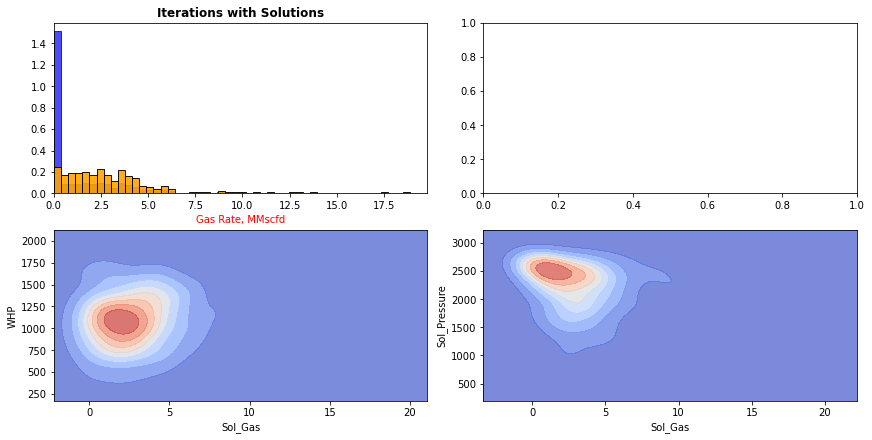

In [12]:

p = np.percentile(df_QP_sol['Sol_Gas'], 1)
print ("Percentile 1 = ", p)
p = np.percentile(df_QP_sol['Sol_Gas'], 75)
print ("Percentile 75 = ", p)


### Plot Data Frames
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12,6), layout ='constrained')

plot_i = 0
ax[plot_i,0].hist(df_QP_All['Sol_Gas'], bins=50, density=True, align='mid', color=c_blue, alpha=0.7, edgecolor = "black", 
                  cumulative=False)

ax[plot_i,0].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[plot_i,0].set_title('All iterations', weight='bold', color=c_red)
ax[plot_i,0].set_xlim(left=0)
ax[plot_i,0].set_ylim(bottom=0)

plot_i = 0
ax[plot_i,0].hist(df_QP_sol['Sol_Gas'], bins=50, density=True, align='mid', color=c_orange, alpha=0.9, edgecolor = "black",
                 cumulative=False)

ax[plot_i,0].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[plot_i,0].set_title('Iterations with Solutions', weight='bold', color='black')
ax[plot_i,0].set_xlim(left=0)
ax[plot_i,0].set_ylim(bottom=0)

sns.kdeplot(data=df_Input_sol, x="Sol_Gas", y="WHP", fill=True, alpha=0.7, cut=2, ax=ax[1,0], 
            cmap='coolwarm', label='PROSPER density map', thresh=0)

sns.kdeplot(data=df_Input_sol, x="Sol_Gas", y="Sol_Pressure", fill=True, alpha=0.7, ax=ax[1,1], 
            cmap='coolwarm', label='PROSPER density map', thresh=0)


<div class="alert alert-success">
<font color='black'>
    
# OUTLIERS
  
Based on above distributions delete outliers. <br>
Specify low and high percentile to drop rows outside the limits
</font>
</div>

In [ ]:

Qg_mean = df_QP_sol['Sol_Gas'].mean()
P_mean = df_QP_sol['Sol_Pressure'].mean()

Max_P_to_drop_vals = 98
pval_to_drop = np.percentile(df_QP_sol['Sol_Gas'], Max_P_to_drop_vals)

df_QP_sol.drop(df_QP_sol[df_QP_sol.Sol_Gas > pval_to_drop].index, inplace=True)


Min_P_to_drop_vals = 2
pval_to_drop = np.percentile(df_QP_sol['Sol_Gas'], Min_P_to_drop_vals)

df_QP_sol.drop(df_QP_sol[df_QP_sol.Sol_Gas < pval_to_drop].index, inplace=True)


### Compare Stadistics ###
dfS_col_names =df_QP_All.columns.tolist()
dfS_In_col_names =df_QP_sol.columns.tolist()

df1 = pd.DataFrame(df_QP_All.describe(), columns=dfS_col_names)
df2 = pd.DataFrame(df_QP_sol.describe(), columns=dfS_In_col_names)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('All Iteration Results')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Iterations with Solution')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

p = np.percentile(df_QP_sol['Sol_Gas'], 1)
print ("Percentile 1 = ", p)
p = np.percentile(df_QP_sol['Sol_Gas'], 95)
print ("Percentile 95 = ", p)

<div class="alert alert-success">
<font color='blue'>
    
# QC SOLUTION (P vs Qg) Data Generated with loop
  
***
</font>
Cell 39
</div>


NameError: name 'Sol_Gas_mean_S' is not defined

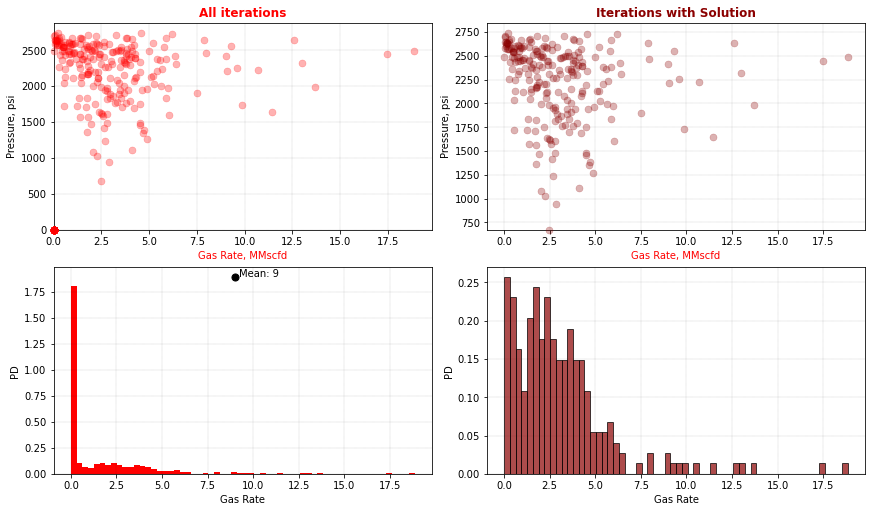

In [15]:

fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12,7), layout ='constrained')

ax[0,0].scatter(df_QP_All['Sol_Gas'], df_QP_All['Sol_Pressure'],  label='Solutions', color=c_red, alpha=0.3,s= 50,
           #edgecolor=(0/255, 0/255, 255/255),
           linewidth=0.5,
           zorder=10, clip_on=False)

ax[0,0].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[0,0].set_ylabel('Pressure, psi')
ax[0,0].set_title('All iterations', weight='bold', color=c_red)
ax[0,0].set_xlim(left=0)
ax[0,0].set_ylim(bottom=0)

ax[0,0].grid(color = c_black, linestyle = '--', linewidth = 0.1)

## Generate Histogram for All Iterations ##
ax[1,0].hist(df_QP_All['Sol_Gas'], bins=60, density=True, align='mid', color=c_red, alpha=1)
ax[1,0].set_xlabel('Gas Rate')
ax[1,0].set_ylabel('PD')
ax[1,0].set_title('')

#get x-axis and y-axis limits
xmin, xmax, ymin, ymax = ax[1,0].axis()

## Plot Mean as Dot ##
Sol_Gas_mean = 9
Sol_Gas_pdf_mean = 3 #stats.norm(loc= Sol_Gas_mean, scale = Sol_Gas_SD).pdf(Sol_Gas_mean)
#print(Sol_Gas_pdf_mean)
ax[1,0].scatter(Sol_Gas_mean, ymax,  label='Solutions',color=(0/255, 0/255, 0/255), alpha=1, s= 50)

ax[1,0].grid(color = c_black, linestyle = '--', linewidth = 0.1)

str_text = 'Mean: '+ str(np.round(Sol_Gas_mean, decimals = 2))
ax[1,0].annotate(str_text, (Sol_Gas_mean+0.2, ymax));

#ax[1,0].annotate('Mean', (Sol_Gas_mean+0.2, Sol_Gas_pdf_mean));



###############################################
## Create plot for Iterations with Solution ###
ax[0,1].scatter(df_QP_sol['Sol_Gas'], df_QP_sol['Sol_Pressure'],  
           label='Solutions', color=c_Dred, alpha=0.3,s= 50,
           #edgecolor=(0/255, 0/255, 255/255),
           linewidth=0.5,
           zorder=10, clip_on=False)

ax[0,1].set_xlabel('Gas Rate, MMscfd', color=(255/255, 0/255, 0/255))
ax[0,1].set_ylabel('Pressure, psi')
ax[0,1].set_title('Iterations with Solution', weight='bold', color=c_Dred)

#ax[0,1].set_xlim(left=0)
ax[0,1].set_ylim(bottom=0)
pmin = df_QP_sol['Sol_Pressure'].min()
ax[0,1].set_ylim(bottom=pmin)

ax[0,1].grid(color = c_black, linestyle = '--', linewidth = 0.1)

## Generate Histogram for Iterations with Solution ##
ax[1,1].hist(df_QP_sol['Sol_Gas'], bins=60, density=True, align='mid', color=c_Dred, alpha=0.7, edgecolor = "black")
ax[1,1].set_xlabel('Gas Rate')
ax[1,1].set_ylabel('PD')
ax[1,1].set_title('')

ax[1,1].set_axisbelow(True)
ax[1,1].grid(color = c_black, linestyle = '--', linewidth = 0.1)

#get x-axis and y-axis limits
xmin, xmax, ymin, ymax = ax[1,1].axis()
#print(ymax)

## Plot Mean as Dot ##
Sol_Gas_pdf_mean = stats.norm(loc= Sol_Gas_mean_S, scale = Sol_Gas_SD_S).pdf(Sol_Gas_mean_S)
#print(Sol_Gas_pdf_mean)
ax[1,1].scatter(Sol_Gas_mean_S, ymax,  label='Solutions',color=(0/255, 0/255, 0/255), alpha=1, s= 50)

str_text = 'Mean: '+ str(np.round(Sol_Gas_mean_S, decimals = 2))
ax[1,1].annotate(str_text, (Sol_Gas_mean_S+0.2, ymax));

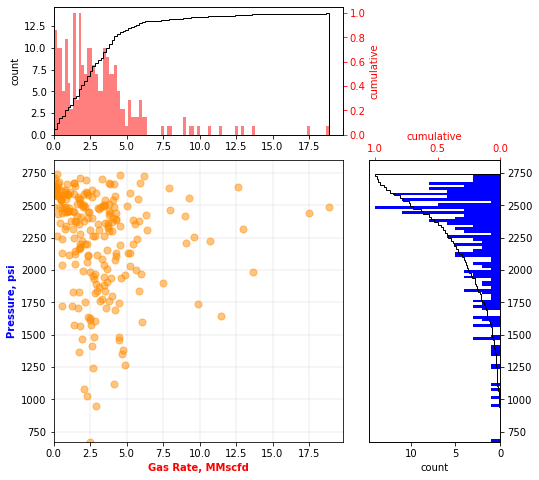

In [16]:
import matplotlib.gridspec as gridspec


x = df_QP_sol['Sol_Gas']
y = df_QP_sol['Sol_Pressure']

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)

ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(x,y,marker='.', color=(255/255, 140/255, 0/255), s= 200, alpha=0.5)

ax_main.set_xlabel('Gas Rate, MMscfd', color=c_red, weight='bold')
ax_main.set_ylabel('Pressure, psi', color=c_blue, weight='bold')

ax_main.set_axisbelow(True)
ax_main.grid(color = c_black, linestyle = '--', linewidth = 0.1, zorder=1)

ax_main.set_xlim(left=0)
ax_main.set_ylim(bottom=0)
ax_main.set_ylim(bottom=pmin)

## Gas Rate Distribution ##
ax_xDist.hist(x,bins=100,align='mid', color=c_red, alpha=0.5)
ax_xDist.set(ylabel='count')

ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=100,cumulative=True,histtype='step',density=True,color=(0/255, 0/255, 0/255),align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative',color='r')

## Pressure Distribution ##
ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid', color=c_blue)
ax_yDist.set(xlabel='count')

ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=100,cumulative=True, histtype='step',density=True,color=(0/255, 0/255, 0/255),align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r')

ax_yDist.invert_xaxis()
ax_yDist.yaxis.tick_right()
ax_yCumDist.invert_xaxis()

plt.show()

C:\Users\Franco\anaconda3\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, ' PROSPER results (density map) vs Production Test data ')

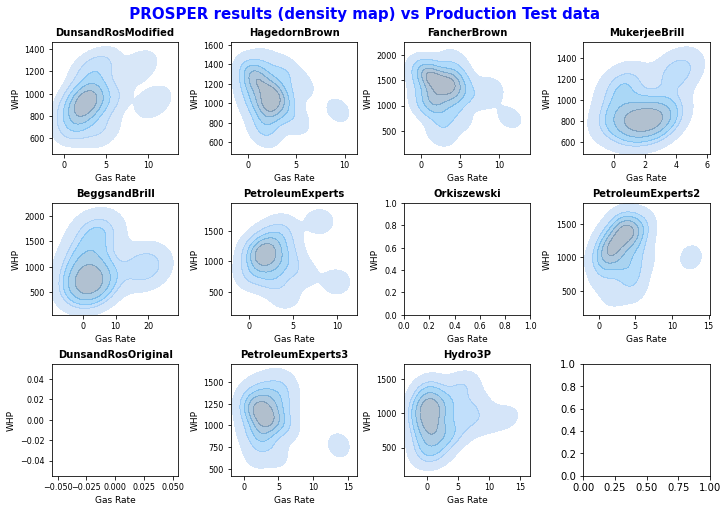

In [18]:
import math

count_corr = len(VLP_index_list)/4

fig, ax = plt.subplots(nrows = math.ceil(count_corr), ncols=4, figsize=(10,7), layout ='constrained')

pcol = 0
prow = 0
corrL = 0
for xi in VLP_index_list:   
    #print(xi)

    df1 = df_Input_sol.loc[df_Input_sol['VLP_Corr'] == xi ]

    sns.kdeplot(data=df1, x="Sol_Gas", y="WHP", levels=6, fill=True, alpha=0.4, cut=2, ax=ax[prow,pcol], label='PROSPER density map')

    #ax[prow,pcol].scatter(data= df_PDP_hist, x='Gas', y='WHP', color='gray',edgecolors= "black", label='Production Test')
    ax[prow,pcol].set_title(VLP_names[corrL], weight='bold', fontsize=10)
    ax[prow,pcol].set_ylabel('WHP', fontsize=9)
    ax[prow,pcol].set_xlabel('Gas Rate', fontsize=9)
    ax[prow,pcol].tick_params(axis='both', which='major', labelsize=8)
    
    pcol = pcol + 1
    corrL = corrL+1
    if pcol >3:
        pcol = 0
        prow = prow + 1

fig.suptitle(' PROSPER results (density map) vs Production Test data ', fontsize=15, weight='bold', color='blue')

<div class="alert alert-success">
<font color='blue'>
    
# Solution (Qg) vs correlation
  
***
</font> </div>

Text(0.5, 1.0, '')

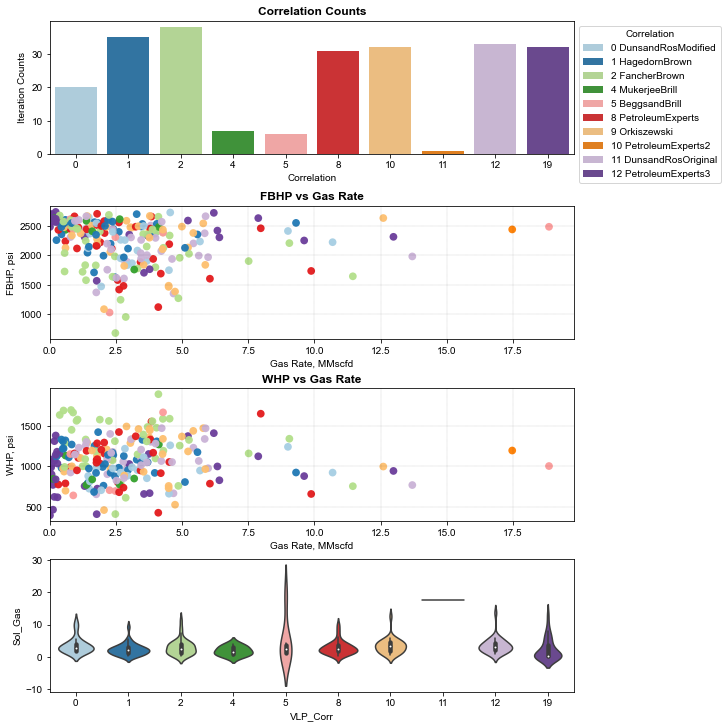

In [19]:
VLP_index_name =[]
xii  = 0
for xi in VLP_names:   
    vlp_val = str(VLP_index_list[xii]) + ' ' +  str(VLP_names[xii])
    VLP_index_name.append(vlp_val)
    xii = xii + 1
    
 
x = df_Input_sol['Sol_Gas']
y = df_Input_sol['Sol_Pressure']
y2 = df_Input_sol['WHP']
xc = df_Input_sol['VLP_Corr']

fig, ax = plt.subplots(nrows = 4, ncols=1, figsize=(10,10), layout ='constrained')

Pal = "Paired"

nplot = ax[0]
#sns.stripplot(ax =np, x = c, y = x, alpha=0.95, s = 5, hue = c, palette = Pal, linewidth=0)
sns.countplot(ax =nplot, x=df_Input_sol['VLP_Corr'], palette = Pal, hue = xc, dodge=False)

nplot.set_title('Correlation Counts', weight='bold', color=c_black)
nplot.set_xlabel('Correlation')
nplot.set_ylabel('Iteration Counts')
nplot.legend(title='Correlation',labels=VLP_index_name)
sns.move_legend(ax[0], "upper left", bbox_to_anchor=(1, 1))

sns.set_style("white")

nplot = ax[1]
sns.scatterplot(ax=nplot, x = x, y = y, alpha=0.95, s = 60, hue = xc, palette=Pal, linewidth=0, edgecolor='black', legend=False)
nplot.set_title('FBHP vs Gas Rate', weight='bold', color=c_black)
nplot.set_xlabel('Gas Rate, MMscfd')
nplot.set_ylabel('FBHP, psi')
nplot.set_xlim(left=0)
nplot.grid(color = c_black, linestyle = '--', linewidth = 0.1)

nplot = ax[2]
sns.scatterplot(ax=nplot, x = x, y = y2, alpha=0.95, s = 60, hue = xc, palette=Pal, linewidth=0, edgecolor='black', legend=False)
nplot.set_title('WHP vs Gas Rate', weight='bold', color=c_black)
nplot.set_xlabel('Gas Rate, MMscfd')
nplot.set_ylabel('WHP, psi')
nplot.set_xlim(left=0)
nplot.grid(color = c_black, linestyle = '--', linewidth = 0.1)

nplot = ax[3]
sns.violinplot(ax = nplot, x = xc, y = x,  palette=Pal, legend=False)
nplot.set_title('', weight='bold', color=c_black)





<div class="alert alert-success">
<font color='blue'>
    
# 7. ANALYZE INPUT VALUES
#### CELL 46
***
</font>
</div>


In [ ]:
## RUN MULTIPLE CELLS ##
#Javascript("Jupyter.notebook.execute_cell_range(40,51)")

## QC Input data generated with Loop

    There are 3 dictionaries/DataFrames containing the results
    df_Input_All = All iterations
    df_QP_sol_S = Iterations with solution (Qg > 0)
    df_Input_No_sol = Input for iterations without solution (Qg = 0)

In [ ]:
## Show Inputa DataFrame - ALL ITERATIONS
# i is generated inside Loop
df_Input_All.head(i+1)

In [ ]:
# Show Input Data Statistics - ALL ITERATIONS
df_Input_All.describe()

## View DataFrame iterations with solutions (Qg > 0)

In [ ]:
## Show Inputa DataFrame - ONLY ITERATIONS WITH SOLUTIONS
df_Input_sol

In [ ]:
%%writefile example.png
##### Show Input Data Statistics - ONLY ITERATIONS WITH SOLUTIONS
print('Statistics summary')
df_Input_sol.describe().applymap('{:,.2f}'.format)



In [ ]:
# Show Input Data Statistics - ONLY ITERATIONS WITHOUT SOLUTIONS
df_Input_No_sol.describe()

## Plot Distribution for input variables (Iterations with Solution)

In [ ]:
## Get Column names
df_col_names_Inputs = df_Input_sol.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows)-0, ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(df_col_names_Inputs[ii])
    if (df_col_names_Inputs[ii] == 'VLP_Corr' or df_col_names_Inputs[ii] == 'VLP_Corr_Name'):
        df_col_names_Inputs[ii]
    else:    
        AX[xx,yy].hist(df_Input_sol[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', 
        color=(255/255, 140/255, 0/255), alpha=0.7)

        AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx,yy].set_ylabel('PD')
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')

        yy = yy + 1
        cc = cc + 1

        if cc > 2:
            cc = 0
            yy = 0
            xx = xx + 1

print('Plot Distribution for input variables (Iterations with Solution)')

## Plot Distribution for input variables (Iterations without Solution, Qg = 0)

In [ ]:
## Get Column names
df_col_names_Inputs =df_Input_No_sol.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows)-0, ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    if (df_col_names_Inputs[ii] == 'VLP_Corr' or df_col_names_Inputs[ii] == 'VLP_Corr_Name'):
        df_col_names_Inputs[ii]
    else: 
        AX[xx,yy].hist(df_Input_No_sol[df_col_names_Inputs[ii]], bins=100, density=True, align='mid', color=c_Dred, alpha=0.5)
        AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx,yy].set_ylabel('PD')
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')

        yy = yy + 1
        cc = cc + 1

        if cc > 2:
            cc = 0
            yy = 0
            xx = xx + 1
        
print('Plot Distribution for input variables (Iterations without Solution, Qg = 0)')

## Plot Distributions with solution and without solution next to each other

In [ ]:
## Get Column names
df_col_names_Inputs = df_Input_sol.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = 4, ncols=4, figsize=(15,10), layout ='constrained')

yy = 0
xx = 0
cc = 0
n_bins = 35

for ii in range(8):
  

    if (df_Input_sol.columns[ii] == 'VLP_Corr_Name' or df_Input_sol.columns[ii] == 'VLP_Corr' \
        or df_Input_sol.columns[ii] == 'Sol_Gas' or df_Input_sol.columns[ii] == 'Sol_Pressure'):
        if1 = 0
    else:
        #print(df_Input_sol.columns[ii])
        AX[xx,yy].hist(df_Input_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid',  \
                       color=c_red, alpha=0.3, label='Solution', cumulative=False)

        AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx,yy].set_ylabel('PD')

        AX[xx,yy].hist(df_Input_No_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', \
                       color=c_blue, alpha=0.3, label='NO Solution', cumulative=False)

        AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx,yy].legend()

        ### Plot Cumulatives ###
        AX[xx+1,yy].hist(df_Input_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid',  \
                       color=c_red, alpha=0.3, label='Solution', cumulative=True)

        AX[xx+1,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx+1,yy].set_ylabel('PD')

        AX[xx+1,yy].hist(df_Input_No_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', \
                       color=c_blue, alpha=0.3, label='NO Solution', cumulative=True)

        AX[xx+1,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx+1,yy].legend()
        
        #plt.legend()
        yy = yy + 1
        cc = cc + 1

        if cc > 3:
            cc = 0
            yy = 0
            xx = xx + 2

<font color='blue'>
    
# Compare distributions using Two-Sample Kolmogorov-Smirnov test

    
***
</font>

The null hypothesis (H<sub> 0 </sub>)  is that 2 independent samples are drawn from the same continuous distribution.
. <br>
p-value < 0.05: significant difference between the two distributions



In [ ]:
# Create DataFrame to contain KS results
df_KS_test = pd.DataFrame(columns = ['Variable Name', 'Statistic', 'p value', 'Result'])
                  
for ii in n:
    test_vals = stats.ks_2samp(df_Input_sol[df_col_names_Inputs[ii]],df_Input_No_sol[df_col_names_Inputs[ii]])
    #print(df_col_names_Inputs[ii])
    print(df_col_names_Inputs[ii], ' = ', test_vals)
    
    a = df_col_names_Inputs[ii]
    b = round(test_vals[0],4)
    cx = round(test_vals[1],6)
    
    if cx < 0.05:
        d = 'H0 rejected, Significant difference'
    else:
        d = 'H0 not rejected'
    df_KS_test.loc[len(df_KS_test.index)] = [a,b,cx,d]
    
df_KS_test

def highlight(s):
    if s.Result != 'H0 not rejected':
        return ['background-color: yellow'] * len(s)
    else:
        return ['background-color: white'] * len(s)

df_KS_test.style.apply(highlight, axis=1)

<font color='blue'>
    
# 8. Create cross-plots input vs solutions
CELL 51
***
</font>



In [ ]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(56,61)")

In [ ]:
## Get Column names
df_col_names =df_VLP_IPR.columns.tolist()
df_col_names_In = df_Input_All.columns.tolist()
print(df_col_names_In)

## Cross-plots for all Iterations

In [ ]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(df_Input_All.columns[ii])
    
    if df_Input_All.columns[ii] != 'VLP_Corr_Name':
        AX[xx,yy].scatter(df_QP_All['Sol_Gas'], df_Input_All[df_col_names_In[ii]], color=c_pale_green, alpha=0.5)
        AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
        AX[xx,yy].set_ylabel(df_col_names_In[ii])
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')

        # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
        x = df_QP_All['Sol_Gas']
        y = df_Input_All[df_col_names_In[ii]]
        b, m = np.polynomial.polynomial.polyfit(x,y, 1)


        AX[xx,yy].plot(x, b + m * x, '-')

        yy = yy + 1
        cc = cc + 1

        if cc > 2:
            cc = 0
            yy = 0
            xx = xx + 1


## Cross-Plots for Iterations with solutions

In [ ]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(ii)
    if df_Input_sol.columns[ii] != 'VLP_Corr_Name':
        AX[xx,yy].scatter(df_Input_sol['Sol_Gas'], df_Input_sol[df_col_names_In[ii]], color=(255/255, 140/255, 0/255), alpha=0.7, s = 50)
        AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
        AX[xx,yy].set_ylabel(df_col_names_In[ii])
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')

        # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
        x = df_Input_sol['Sol_Gas']
        y = df_Input_sol[df_col_names_In[ii]]
        b, m = np.polynomial.polynomial.polyfit(x,y, 1)


        AX[xx,yy].plot(x, b + m * x, '-', linewidth=3, color = c_black)

        yy = yy + 1
        cc = cc + 1

        if cc > 2:
            cc = 0
            yy = 0
            xx = xx + 1

<font color='blue'>
    
# 9. CALCULATE CORRELATION COEFFICIENTS
***
</font>

In [ ]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(61,66)")

In [ ]:
# Create new DF to append Gas solution to input variables
corr_DF = df_Input_All.copy(deep=True)

# delete Correlation name
corr_DF.drop(['VLP_Corr_Name'], axis=1, inplace=True)

## Add Gas Solutions Column
corr_DF['Gas_Sol'] = df_QP_All['Sol_Gas']
corr_DF.round(2)


In [ ]:
## Check statistics for new DataFrame
corr_DF.describe().round(2)

In [ ]:
## Calculate correlation parameters PANDAS
corr_DF_Coeff = corr_DF.corr()

## Print Gas Rate vs Input Correlations
Gas_Sol_Coeff = corr_DF_Coeff['Gas_Sol']
type(Gas_Sol_Coeff)

### Convert to DataFrame ###
Gas_Sol_Coeff_df = pd.DataFrame(Gas_Sol_Coeff)
Gas_Sol_Coeff_df

In [ ]:
### Drop Gas Sol Row and NaN values ###
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.dropna()
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['Gas_Sol'])

print(Gas_Sol_Coeff_df.index)
Gas_Sol_Coeff_df

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,3), layout ='constrained')

Input_Var_Names = Gas_Sol_Coeff_df.index

y_pos = np.arange(len(Input_Var_Names))
performance = 3 + 10 * np.random.rand(len(Input_Var_Names))
error = np.random.rand(len(Input_Var_Names))

import matplotlib.colors as mcolors
clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

ax.barh(y_pos, Gas_Sol_Coeff_df['Gas_Sol'], align='center', color=rvb(y_pos/8), alpha=0.5)

ax.set_yticks(y_pos, labels=Input_Var_Names)


ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Correlation Between Input variables and Gas Rate (Solution)')

In [ ]:
corr_DF2 = corr_DF.copy(deep=True)

corr_DF2.loc[corr_DF2['Gas_Sol'] > 0, 'Gas_Sol'] = 1

corr_DF2

In [ ]:
# Histogram
#sns.histplot(x = corr_DF2['WGR'], hue = corr_DF2['Gas_Sol'], bins = 50)

# Equivalent to:
#sns.histplot(x = "x", hue = "group", data = df)
#plt.savefig('save_as_a_png.png')

<font color='blue'>
    
# 10. PLOT IPR VS VLP
***
</font>

In [ ]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(68,73)")

In [ ]:
df.replace(0, np.nan, inplace=True)
df

In [ ]:
df.describe()

## Plot VLP and IPR for specific Iteration (Index_TP)

In [ ]:


Index_TP = 341 ## Specify iteration to plot VLP, IPR and Solution

## Get Column names
df_col_names =df.columns.tolist()

print('Iteration Index: ', Index_TP)
print('IPR col name: ', df_col_names[Index_TP*3])
print('VLP col name: ', df_col_names[(Index_TP*3)+1])

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,5), layout ='constrained')

ax[0].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
         marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

ax[0].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
         markerfacecolor=(192/255, 192/255, 192/255))

ax[0].plot(df_QP_All['Sol_Gas'].iloc[Index_TP], df_QP_All['Sol_Pressure'].iloc[Index_TP], label='Solution', marker = 'o', 
         markersize = 12,linestyle= '',
         markerfacecolor=(255/255, 140/255, 0/255) )

ax[0].set_xlabel('Gas Rate, MMscfd')
ax[0].set_ylabel('Pressure, psi')
ax[0].set_title('VLP vs IPR (first sample)', weight='bold', color=(0/255, 0/255, 255/255))
ax[0].legend()
ax[0].set_xlim(left=0)



### Second Chart ###
ax[1].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
         marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

ax[1].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
         markerfacecolor=(192/255, 192/255, 192/255))

ax[1].plot(df_QP_All['Sol_Gas'].iloc[Index_TP], df_QP_All['Sol_Pressure'].iloc[Index_TP], label='Solution', marker = 'o', 
         markersize = 12,linestyle= '',
         markerfacecolor=(255/255, 140/255, 0/255) )

ax[1].set_xlabel('Gas Rate, MMscfd')
ax[1].set_ylabel('Pressure, psi')
ax[1].set_title('VLP vs IPR (first sample)', weight='bold', color=(0/255, 0/255, 255/255))
ax[1].legend()
ax[1].set_xlim(left=0)

P_max = df[df_col_names[(Index_TP*3)+1]].max()
ax[1].set_ylim(top=P_max+300)

#ax[0,0].grid(color = c_black, linestyle = '--', linewidth = 0.1)

#str_text = 'Mean: '+ str(np.round(Sol_Gas_mean, decimals = 2))
#ax[1,0].annotate(str_text, (Sol_Gas_mean+0.2, Sol_Gas_pdf_mean));

print("Gas Solution = ", df_QP_All['Sol_Gas'].iloc[Index_TP])
print("Pressure Solution = ", df_QP_All['Sol_Pressure'].iloc[Index_TP])


## 9.2 Plot multiple (IPR + VLP) curves

In [ ]:
## Get Column names
df_col_names =df.columns.tolist()
#print(df_col_names)
#print(df_col_names[1])

n = range(1000)
Qg_i = 0
ipr_i = 2
vlp_i = 1
for i in n:

    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[ipr_i]], c='green', label=df_col_names[ipr_i])
    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[vlp_i]], c='black', label=df_col_names[vlp_i])
    ipr_i = ipr_i + 3
    vlp_i = vlp_i + 3
    Qg_i =  Qg_i + 3
    
plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
plt.xlim(left=0)
plt.ylim(bottom=0)



x = np.percentile(df_QP_sol['Sol_Gas'], 90)
y = np.percentile(df_QP_sol['Sol_Pressure'], 90)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )


x = np.percentile(df_QP_sol['Sol_Gas'], 10)
y = np.percentile(df_QP_sol['Sol_Pressure'], 10)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )

x = np.percentile(df_QP_sol['Sol_Gas'], 50)
y = np.percentile(df_QP_sol['Sol_Pressure'], 50)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )

plt.show()

### Plot Solutions as Scatter and Distributions

<div class="alert alert-success">
<font color='blue'>
    
# CREATE POWERPOINT PRESENTATION

***
</font>
</div>


In [20]:
from pptx import Presentation
X = Presentation()

ModuleNotFoundError: No module named 'pptx'

In [ ]:
Layout = X.slide_layouts[0] 
first_slide = X.slides.add_slide(Layout) # Adding first slide
first_slide.shapes.title.text = "Creating a powerpoint using Python"

first_slide.placeholders[1].text = "Created by Tutorialpoints"
X.save("First_presentation.pptx")